# Mapping Remote Work Trends in U.S. Counties: A Spatial Analysis of Remote Work Intensity (2016–2022)

This notebook provides a spatial analysis of remote work trends across U.S. counties, using data from the American Community Survey (ACS) from 2016 to 2022.

## Project Overview

The analysis in this notebook focuses on:
1. **Data Collection**: Fetching data from the ACS API on remote work hours and total work hours per county, then normalizing these values to show the proportion of remote work.
2. **Geographic Mapping**: Visualizing normalized remote work intensity on U.S. county maps using `pygris` and `geopandas`.
3. **Visualization Options**:
   - **Static Grid**: Displaying a series of annual maps in a grid format to easily compare remote work trends over the years.
   - **Animated Visualization**: Creating an animation of the maps to provide a dynamic view of temporal changes in remote work distribution.

## Visualization Approach

two visualization approaches in this notebook:

### 1. Static Grid of Maps

The static grid displays each year’s map in a grid layout, allowing for side-by-side comparison across multiple years. This format is useful for quick, direct comparisons between specific years.

### 2. Animated Map Sequence

An animated sequence shows the progression of remote work intensity over time, providing a clear visualization of geographic and temporal patterns in remote work. This is ideal for understanding overall trends and seeing year-over-year shifts in a dynamic way.

## Data Source

The data used in this analysis is sourced from the [American Community Survey (ACS) 5-Year Estimates](https://www.census.gov/programs-surveys/acs), accessed through the U.S. Census Bureau API. We retrieve data on total work hours and remote work hours per county from 2016 to 2022. 

## Requirements

To run this analysis, you will need:
- **API Key**: A valid U.S. Census API key to access ACS data.
- **Libraries Used**:
  - `requests`: For data retrieval from the ACS API.
  - `pandas` & `geopandas`: For data handling and geographic processing.
  - `matplotlib` & `mpl_toolkits.axes_grid1`: For plotting and map customization.
  - `pygris`: For accessing U.S. county shapefiles.
  - `IPython.display.HTML` and `matplotlib.animation.FuncAnimation`: For creating and displaying animations.


---


---


Processing data for 2016...
Processing data for 2017...
Processing data for 2018...
Processing data for 2019...
Processing data for 2020...
Processing data for 2021...
Processing data for 2022...


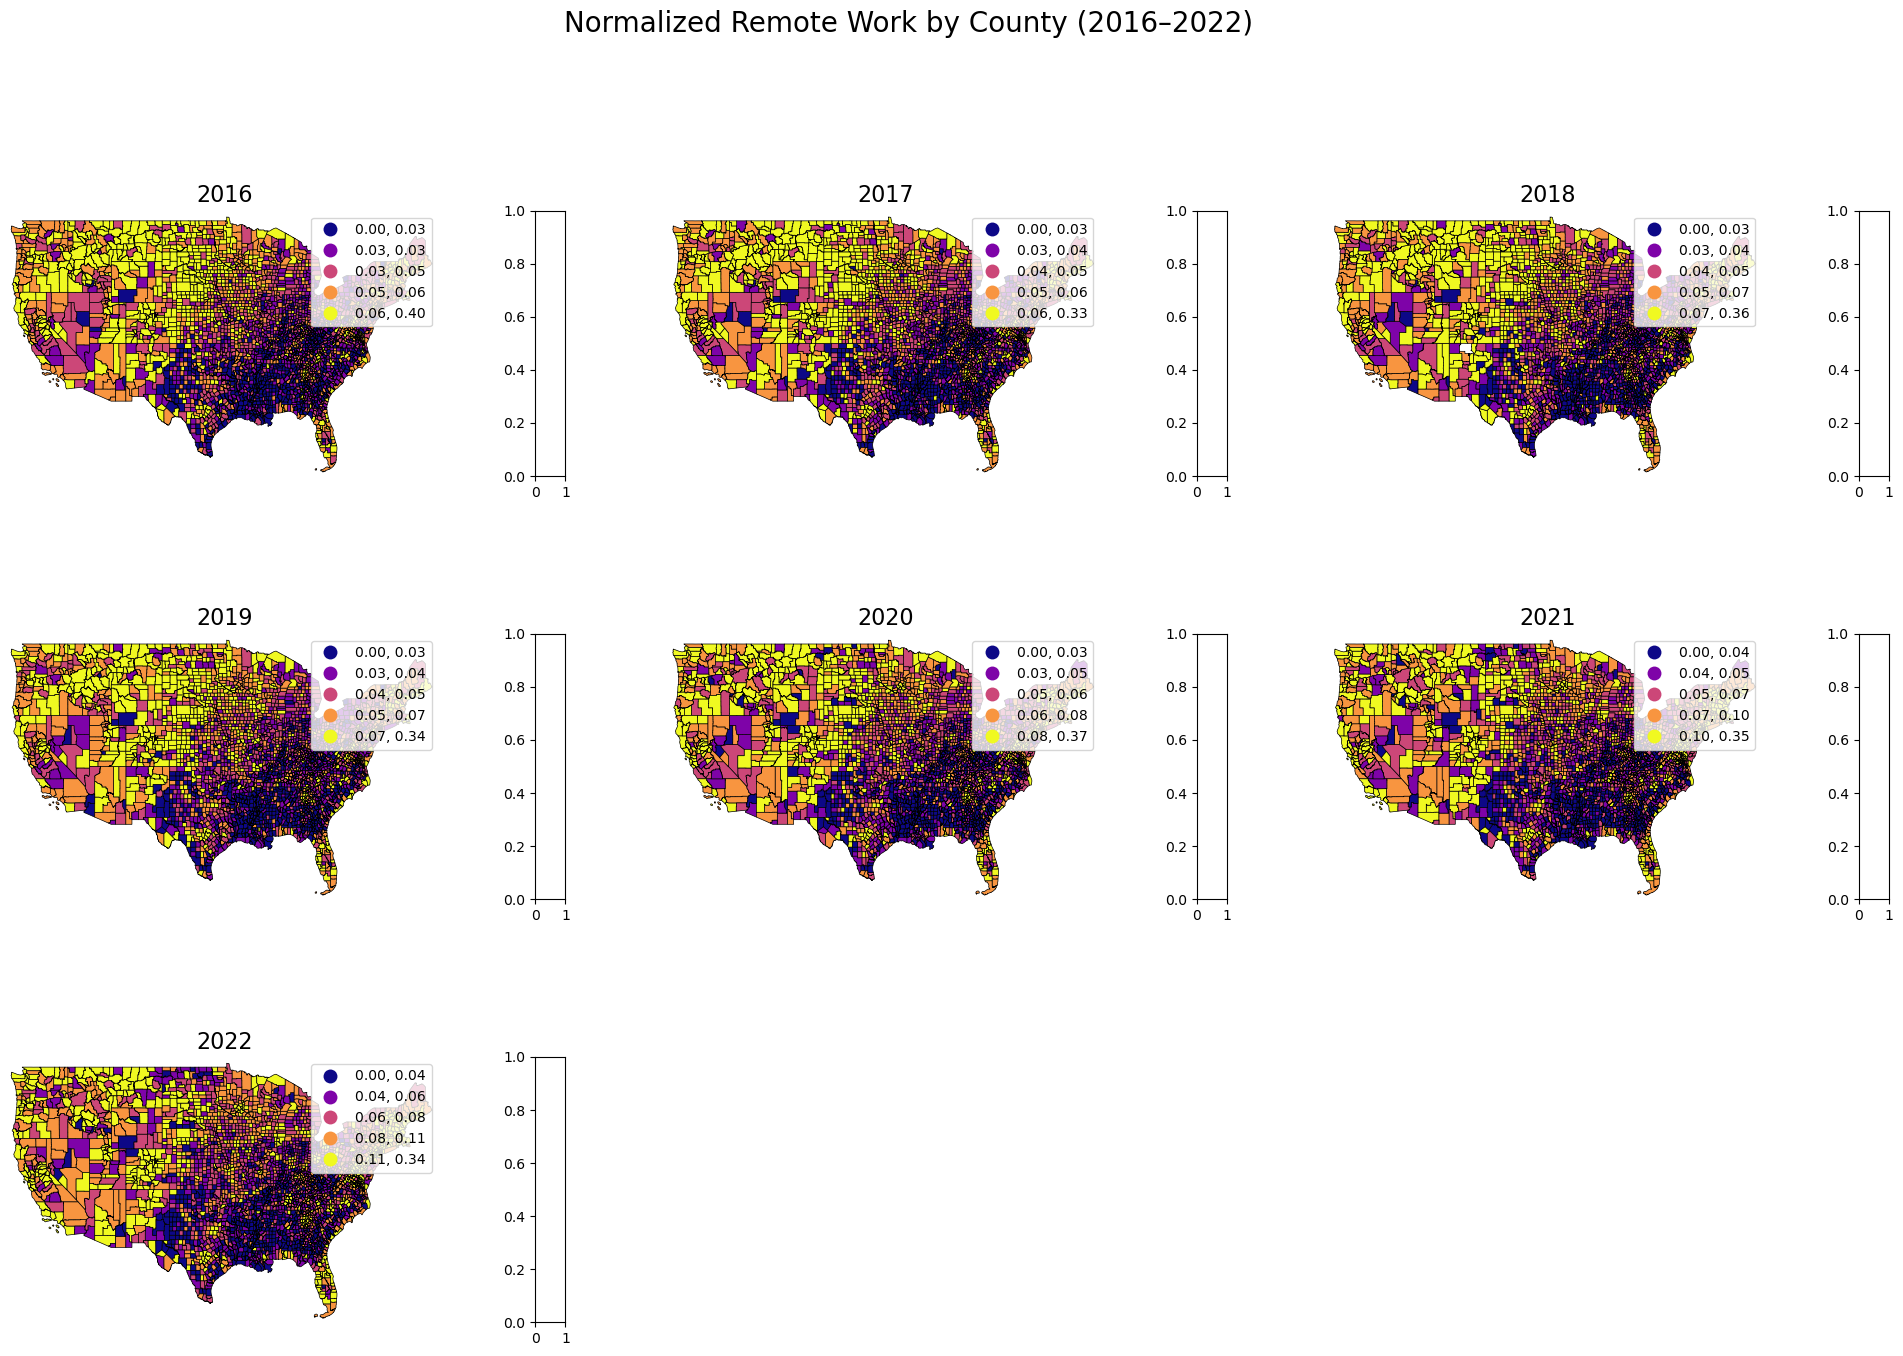

In [19]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import geopandas as gpd
from pygris import counties
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Function to fetch ACS data for remote work and total work hours by county for a given year
def fetch_acs_data(year, api_key):
    base_url = f"https://api.census.gov/data/{year}/acs/acs5"
    params = {
        "get": "NAME,B08006_017E,B08006_001E",  # Remote work hours and total work hours
        "for": "county:*",
        "in": "state:*",
        "key": api_key}
    response = requests.get(base_url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        columns = data[0]
        df = pd.DataFrame(data[1:], columns=columns)
        df["B08006_017E"] = pd.to_numeric(df["B08006_017E"], errors="coerce")
        df["B08006_001E"] = pd.to_numeric(df["B08006_001E"], errors="coerce")
        df["state+county"] = df["state"] + df["county"]
        
        # Normalize the remote work hours by total hours worked
        df["normalized_remote_hours"] = df["B08006_017E"] / df["B08006_001E"]
        return df
    else:
        print(f"Failed to fetch data for {year}. Status code: {response.status_code}")
        return pd.DataFrame()

# API key (ISSUED BY US CENSUS)
api_key = "2a2f8febfd3cdfeebbaaa1e54064cff81232875c"

# List of years to process
years = range(2016, 2023)

# Setting up a grid for the plots
n_cols = 3
n_rows = (len(years) + n_cols - 1) // n_cols  # Calculate the number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()  # Flatten for easy iteration over each subplot

# Loop through each year to fetch data and create a map
for i, year in enumerate(years):
    print(f"Processing data for {year}...")

    # Fetch ACS data
    df = fetch_acs_data(year, api_key)
    
    if df.empty:
        continue

    # Load county shapefiles
    counties_df = counties(year=year, cache=True)
    counties_df["GEOID"] = counties_df["STATEFP"] + counties_df["COUNTYFP"]

    # Merge data with shapefiles
    gdf = counties_df.merge(df, left_on="GEOID", right_on="state+county")
    
    if gdf.empty:
        print(f"No merged data available for {year}")
        continue

    # Plot in the grid
    ax = axes[i]
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    gdf.plot(
        column="normalized_remote_hours",
        cmap="plasma",
        legend=True,
        edgecolor="black",
        linewidth=0.5,
        scheme="Quantiles",
        k=5,
        ax=ax,
        cax=cax
    )
    
    # Set titles and limits
    ax.set_xlim([-125, -66])
    ax.set_ylim([24, 50])
    ax.set_title(f"{year}", fontsize=16)
    ax.axis('off')

# Adjust layout and hide any empty subplots if the grid isn't filled
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.suptitle("Normalized Remote Work by County (2016–2022)", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the main title?? check
plt.show()


Processing data for 2016...
Processing data for 2017...
Processing data for 2018...
Processing data for 2019...
Processing data for 2020...
Processing data for 2021...
Processing data for 2022...
Maps have been created and saved for each year.


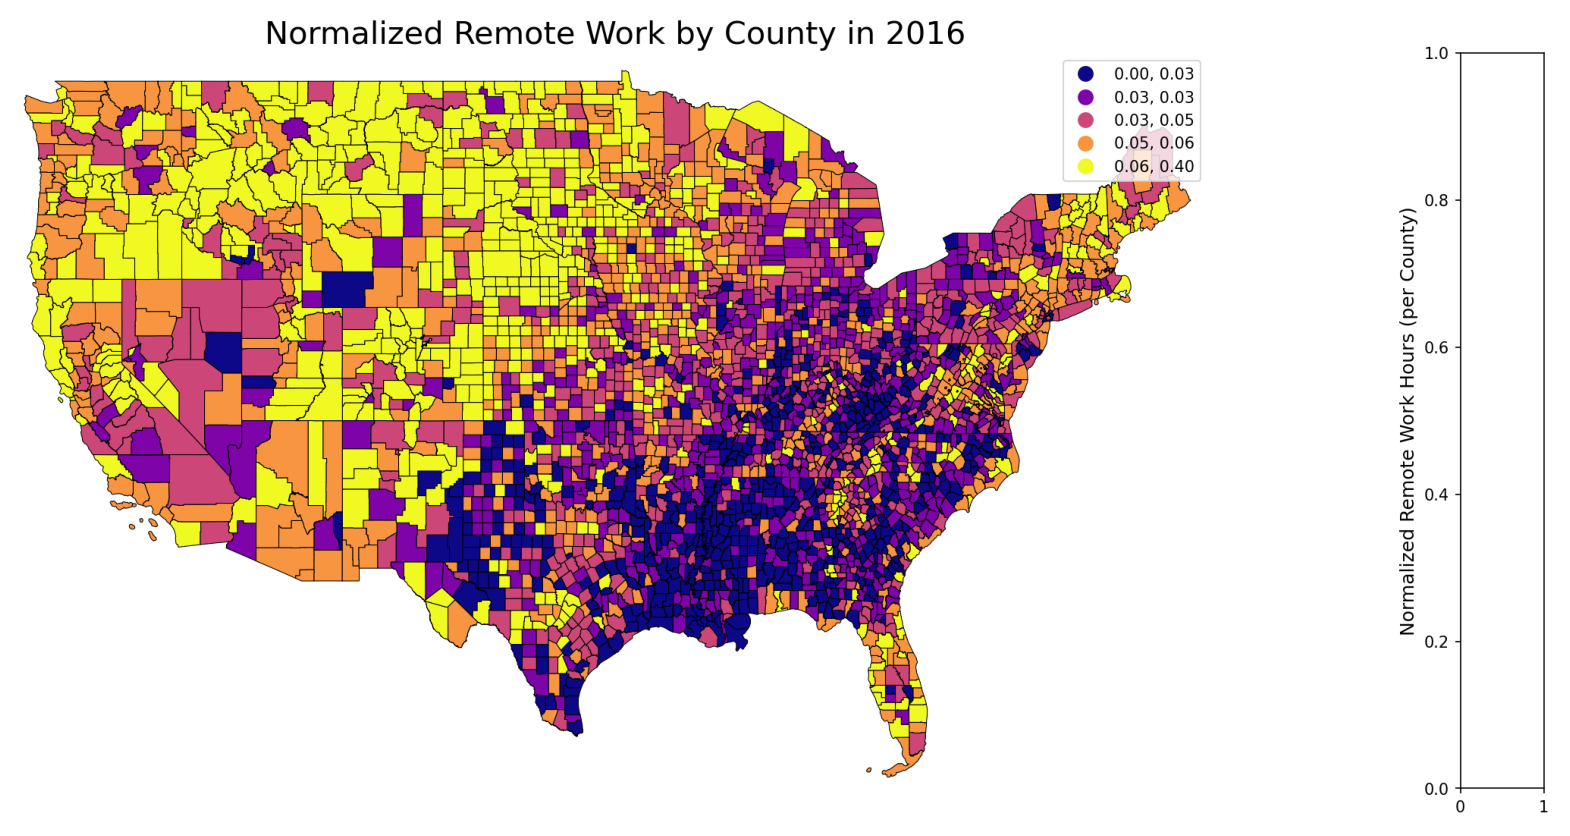

In [18]:
%matplotlib inline
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pygris import counties
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Function to fetch ACS data for remote work and total work hours by county for a given year
def fetch_acs_data(year, api_key):
    base_url = f"https://api.census.gov/data/{year}/acs/acs5"
    params = {
        "get": "NAME,B08006_017E,B08006_001E",  # Remote work hours and total work hours
        "for": "county:*",
        "in": "state:*",
        "key": api_key}
    response = requests.get(base_url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        columns = data[0]
        df = pd.DataFrame(data[1:], columns=columns)
        df["B08006_017E"] = pd.to_numeric(df["B08006_017E"], errors="coerce")
        df["B08006_001E"] = pd.to_numeric(df["B08006_001E"], errors="coerce")
        df["state+county"] = df["state"] + df["county"]
        
        # Normalize the remote work hours by total hours worked
        df["normalized_remote_hours"] = df["B08006_017E"] / df["B08006_001E"]
        return df
    else:
        print(f"Failed to fetch data for {year}. Status code: {response.status_code}")
        return pd.DataFrame()

# API key (ISSUED BY US CENSUS)
api_key = "2a2f8febfd3cdfeebbaaa1e54064cff81232875c"

# List of years to process, not sure about 2023 or earlier
years = range(2016, 2023)

# Save the output map file paths for animation ?? not report thou.. keep static
output_files = []

# Loop through each year to fetch data 
for year in years:
    print(f"Processing data for {year}...")
    
    # Fetch ACS data
    df = fetch_acs_data(year, api_key)
    
    if df.empty:
        continue

    # Load county shapefiles
    counties_df = counties(year=year, cache=True)
    counties_df["GEOID"] = counties_df["STATEFP"] + counties_df["COUNTYFP"]

    # Merge data with shapefiles
    gdf = counties_df.merge(df, left_on="GEOID", right_on="state+county")
    
    if gdf.empty:
        print(f"No merged data available for {year}")
        continue

    # Plot
    fig, ax = plt.subplots(figsize=(20, 15))  #  larger map ???
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)  

    gdf_plot = gdf.plot(
        column="normalized_remote_hours",  
        cmap="plasma", 
        legend=True, 
        edgecolor="black", 
        linewidth=0.5,
        scheme="Quantiles",  # quantiles for better contrast?  
        k=5,  # Number of bins  set to 5 for now..   
        ax=ax,
        cax=cax  )
    
    # Label the color bar
    cbar = gdf_plot.get_figure().get_axes()[-1]  # Get the last axis which is the color bar
    cbar.set_ylabel("Normalized Remote Work Hours (per County)", fontsize=12)

    ax.set_xlim([-125, -66])  # Focus on the continental U.S.
    ax.set_ylim([24, 50])     # Focus on the continental U.S.
    ax.set_title(f"Normalized Remote Work by County in {year}", fontsize=20)
    ax.axis('off')

    file_name = f"normalized_remote_work_{year}.png"
    plt.savefig(file_name, bbox_inches='tight', dpi=150)  # Save with higher resolution
    output_files.append(file_name)
    plt.close()
    
print("Maps have been created and saved for each year.")

# Create an anima
fig, ax = plt.subplots(figsize=(20, 15))  # Increase figsize for the animation
ax.axis('off')  # Remove axes for cleaner appearance
title = ax.set_title("Normalized Remote Work by County Over Time", fontsize=20)

# update anima
def update(frame):
    img = mpimg.imread(output_files[frame])
    ax.clear()  # Clear the current image
    ax.imshow(img)
    ax.axis('off')  # Keep the axes turned off
    title.set_text(f"Year: {2016 + frame}")  # Adjust the title with the current year

# Create anima
anim = FuncAnimation(fig, update, frames=len(output_files), interval=2000)  # 2-second interval

#  anima as HTML 
HTML(anim.to_jshtml())


## more api data to come...
